## Два вопроса

Как правило, исследователей и эконометристов волнуют 2 вопроса:

1. __Как устроен мир?__
    - Как переменная $Y$ зависит от переменной $X$
    
    
2. __Что будет завтра?__
    - Что такое $Y_{n+1}$?
    
Как правило, ответ на эти 2 вопроса сводится к построению некоторой модели, описывающей устройство мира, например, к модели линейной регрессии либо какой-то еще.

## Линейная регрессия

<img src="../images/funik.png" width="500" align='left'>

Линейная регрессия – это пример простейшей модели, с помощью которой мы можем описать устройство мира. Давайте разберемся, что она собой подразумевает.




### Идея

Предположим, что у нас есть случайная величина $Y$ – цены на квартиры и случайная величина $X$ – площадь квартиры. 

In [7]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv('../data/house_prices.csv')

In [30]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Кажется очевидным, что это зависимые случайные величины, ведь чем больше площадь квартиры, тем, как правило, больше ее цена.

Можем проверить это, посчитав, например, выборочную корреляцию между этими случайными величинами:

$$
\widehat{\text{Сorr}}(X, Y) = \frac{\sum (X_i - \bar X) \cdot (Y_i - \bar Y)}{\sqrt{\sum (X_i - \bar X)^2 \cdot \sum (Y_i - \bar Y)^2}}
$$

In [31]:
df[['price', 'area']].corr()

,price,area
price,1.000000,0.535997
area,0.535997,1.000000


Другим способом увидеть это можно, построив график диаграммы рассеивания:

In [32]:
# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline 

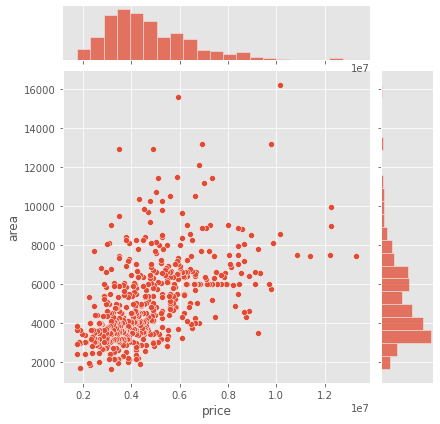

In [33]:
sns.jointplot(data=df, x='price', y='area', kind='scatter');

Так вот, мы видим возрастающую зависимость на графике. Модель линейной регрессии пытается оценить эту зависимость, веря что она линейная, то есть что существует прямая линия, которая будет выражать Y через X, то есть существует следующее уравнение:

$$
Y_i = a + b \cdot X_i
$$

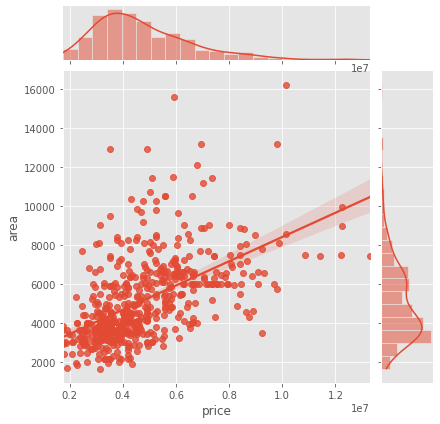

In [34]:
sns.jointplot(data=df, x='price', y='area', kind='reg');

Кажется немного абсурдным: Неужели наш мир так просто устроен, что зависимости можно описать линейным образом? На самом деле конечно же нет, мир устроен сложнее, поэтому и модели на практике используются более сложные, однако линейная регрессия тоже довольно часто неплохо себя показывает, ведь некоторые зависимости действительно неплохо описываются линейным образом.

<img src="../images/linreg_mem.jpeg" width="400" align='center'>

### Модель

Итак, мы с вами определились, что линейная регрессия – это всего навсего уравнение линии над переменными $Y$ и $X$:

$$
Y_i = \beta_0 + \beta_1 \cdot X_i + \epsilon_i
$$

__Замечание:__ При этом переменную $Y$ иногда называют зависимой переменной (потому что она от чего-то зависит), а переменную $X$ объясняющей (потому что она объясняет эту зависимость). 

А теперь давайте подумаем, с чего мы решили, что цена квартиры объясняется только ее площадью? Ведь есть скорее всего и другие факторы: материал дома, расстояние до метро, есть ли балкон и так далее.

Не проблема, если мы добавим все эти переменные также в нашу модель, то получим с вами модель _"множественной линейной регрессии"_:

$$
Y_i = \beta_0 + \beta_1 \cdot X_i^1 + \ldots + \beta_k \cdot X^k_i + \epsilon_i
$$

### Поиск коэффициентов

Хорошо, мы с вами определились, что наш мир устроен линейным образом и что переменную $Y$ можно описать переменными $X^1, \ldots, X^k$ тупо домножив их на некоторые коэффициенты $\beta_1, \ldots, \beta_k$. Но как найти эти коэффициенты? 

Здесь обычно на помощь приходит Метод Наименьших Квадратов (МНК или OLS). Мы не будем подробно обсуждать, как он работает, скажем лишь то, что решается некоторая задача минимизации (см. формулу ниже), на основе которых мы находим оценки $\hat \beta_1, \ldots, \hat \beta_k$ для коэффициентов $\beta_1, \ldots, \beta_k$. 

$$
\sum (Y_i - (\hat \beta_0 + \hat \beta_1 \cdot X^1_i + \ldots + \hat \beta_k \cdot X^k_i))^2 \rightarrow \min_{\hat \beta_1, \ldots, \hat \beta_k}
$$

__Что важно:__

1. Еще раз, $\beta_1, \ldots, \beta_k$ – это параметры модели, которые мы не знаем. Как до этого параметром было, например, $E(X)$


2. $\hat \beta_1, \ldots, \hat \beta_k$ – это оценки для параметров модели. Как до этого оценкой было $\bar x$ для $E(X)$. То есть $\hat \beta_1, \ldots, \hat \beta_k$ – это случайные величины!


3. После оценки вы получаете численные $\hat \beta_1, \ldots, \hat \beta_k$, например, $\hat \beta_1 = 2, \ldots, \hat \beta_k = -1.5$. Числа $2, \ldots, -1.5$ показывают, насколько влияет тот или иной $X$ на $Y$


4. Числа $\hat \beta_1, \ldots, \hat \beta_k$ – случайные величины, поэтому числам, которые в них получаются, верить нельзя. Например, вы получили $\hat \beta_1 = 2$, а по факту $\beta_1 = 0$ и получили вы 2 потому, что у вас такая выборка. Поэтому для каждого коэффициента обычно проверяется гипотеза о равенстве 0, чтобы доказать, что зависимость действительно есть. Это называется _статзначимым_ влиянием. Гипотезы проверяются аналогичным способом, как мы делали до этого (t-test)

## Реализация в Python

### Посмотрим на данные

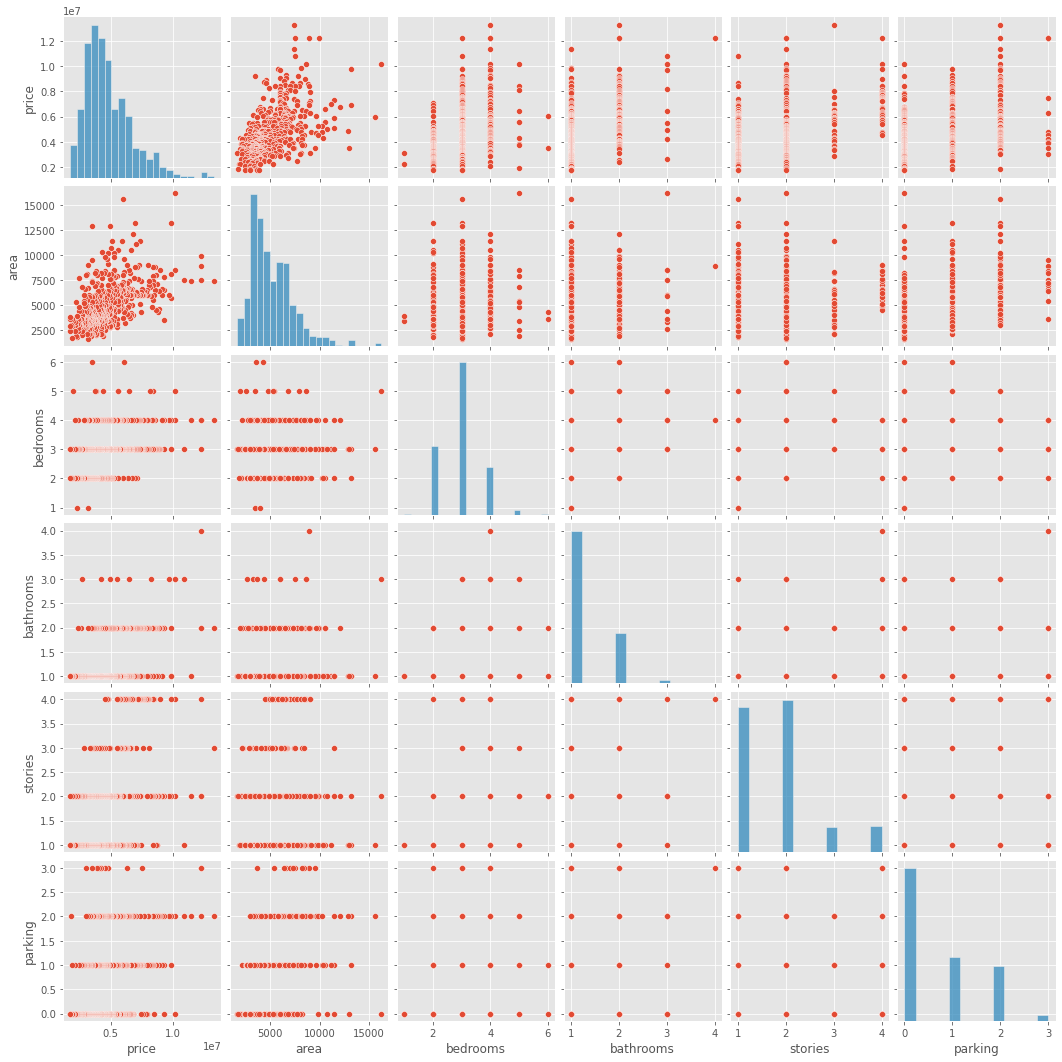

In [35]:
sns.pairplot(df);

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
dtypes: int64(12)
memory usage: 51.2 KB


In [42]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


### Немного обработаем данные

In [39]:
d = {'yes': 1, 'no': 0}

y_n_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[y_n_cols] = df[y_n_cols].apply(lambda x: x.map(d))

df.drop('furnishingstatus', inplace=True, axis=1)

### Оценим модель

In [44]:
from statsmodels.formula.api import ols

ols_formula = 'price ~ area + bedrooms + bathrooms + stories +' \
    'mainroad + guestroom + basement + hotwaterheating + airconditioning + parking + prefarea'

ols = ols(
    ols_formula, 
    data=df
).fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.81
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.01e-121
Time:                        20:49:55   Log-Likelihood:                -8338.8
No. Observations:                 545   AIC:                         1.670e+04
Df Residuals:                     533   BIC:                         1.675e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.831e+05   2.39e+05     

In [ ]:
xgboost / catboost / lightgbm

> Более подробный анализ смотреть тут: https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression/notebook